In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

%matplotlib inline


## Classification

In [ ]:
## Chargement des données de modélisation

In [2]:
df = pd.read_csv('../../data/processed/lieu-compteur-classes-one-hot-encoded.csv', index_col=0)
df.head()

,Jour,Mois,Année,Heure,Jour_semaine,Jour férié,Vacances scolaires,Nom du site de comptage_10 avenue de la Grande Armée,Nom du site de comptage_10 boulevard Auguste Blanqui,Nom du site de comptage_102 boulevard de Magenta,...,Nom du site de comptage_Pont des Invalides,Nom du site de comptage_Pont du Garigliano,Nom du site de comptage_Quai d'Orsay,Nom du site de comptage_Quai des Tuileries,Nom du site de comptage_Totem 64 Rue de Rivoli,Nom du site de comptage_Totem 73 boulevard de Sébastopol,Nom du site de comptage_Totem 85 quai d'Austerlitz,Nom du site de comptage_Totem Cours la Reine,Nom du site de comptage_Voie Georges Pompidou,Comptage horaire
57773,14,6,2023,14,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,451+
1092998,5,1,2025,15,7,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,451+
1171485,20,6,2023,23,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,451+
57487,2,6,2023,16,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,451+
57812,16,6,2023,5,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,451+


In [ ]:
## Renommage des classes et processing variables catégorielles

In [3]:
y = df["Comptage horaire"].replace({
    "0-3": "[00] 0-3",
    "4-9": "[01] 4-9",
    "10-18": "[02] 10-18",
    "19-31": "[03] 19-31",
    "32-46": "[04] 32-46",
    "47-64": "[05] 47-64",
    "65-86": "[06] 65-86",
    "87-115": "[07] 87-115",
    "116-155": "[08] 116-155",
    "156-230": "[09] 156-230",
    "231-450": "[10] 231-450",
    "451+": "[11] 451+",
})
X = df.drop(columns=["Comptage horaire"])

col_norm = ["Jour", "Mois", "Année", "Heure", "Jour_semaine", "Jour férié", "Vacances scolaires"]
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int) 

array = encoder.fit_transform(X[col_norm])

encoded_df_clean = pd.DataFrame(array, columns=encoder.get_feature_names_out(col_norm))

encoded_df_clean.index = X.index

X_clean = pd.concat([X.drop(columns=col_norm), encoded_df_clean], axis=1)

In [ ]:
## Encodage variable cible

In [4]:
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)
y

array([11, 11, 11, ...,  0,  0,  0])

In [ ]:
## Séparation datasets d'entrainement et de test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [ ]:
## Entrainement du modèle

In [7]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
print("train score", clf.score(X_train, y_train))
print("test score", clf.score(X_test, y_test))

train score 0.49016113547315704
test score 0.47253486334895733


In [8]:
y_pred = clf.predict(X_test)

In [9]:
y_test = label_enc.inverse_transform(y_test)
y_pred = label_enc.inverse_transform(y_pred)

In [ ]:
## Matrice de confusion

In [10]:
matrice_confusion = pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites'])
matrice_confusion

Classes prédites,[00] 0-3,[01] 4-9,[02] 10-18,[03] 19-31,[04] 32-46,[05] 47-64,[06] 65-86,[07] 87-115,[08] 116-155,[09] 156-230,[10] 231-450,[11] 451+
Classes réelles,,,,,,,,,,,,
[00] 0-3,16342,3898,537,196,97,101,86,73,111,94,156,74
[01] 4-9,4106,11729,3613,862,131,36,30,14,21,17,43,4
[02] 10-18,537,6309,7924,4176,922,263,114,50,41,27,30,5
[03] 19-31,200,1385,4737,8344,3795,1579,570,249,136,76,66,7
[04] 32-46,155,263,1380,4759,6095,4694,1763,734,335,171,98,9
[05] 47-64,129,85,622,1720,3404,7207,4437,1974,862,481,224,15
[06] 65-86,117,31,277,771,911,4209,6456,4600,2031,981,377,22
[07] 87-115,89,10,130,412,244,965,4032,7443,5001,2025,827,52
[08] 116-155,103,8,41,167,84,158,957,4586,8053,4557,1656,77


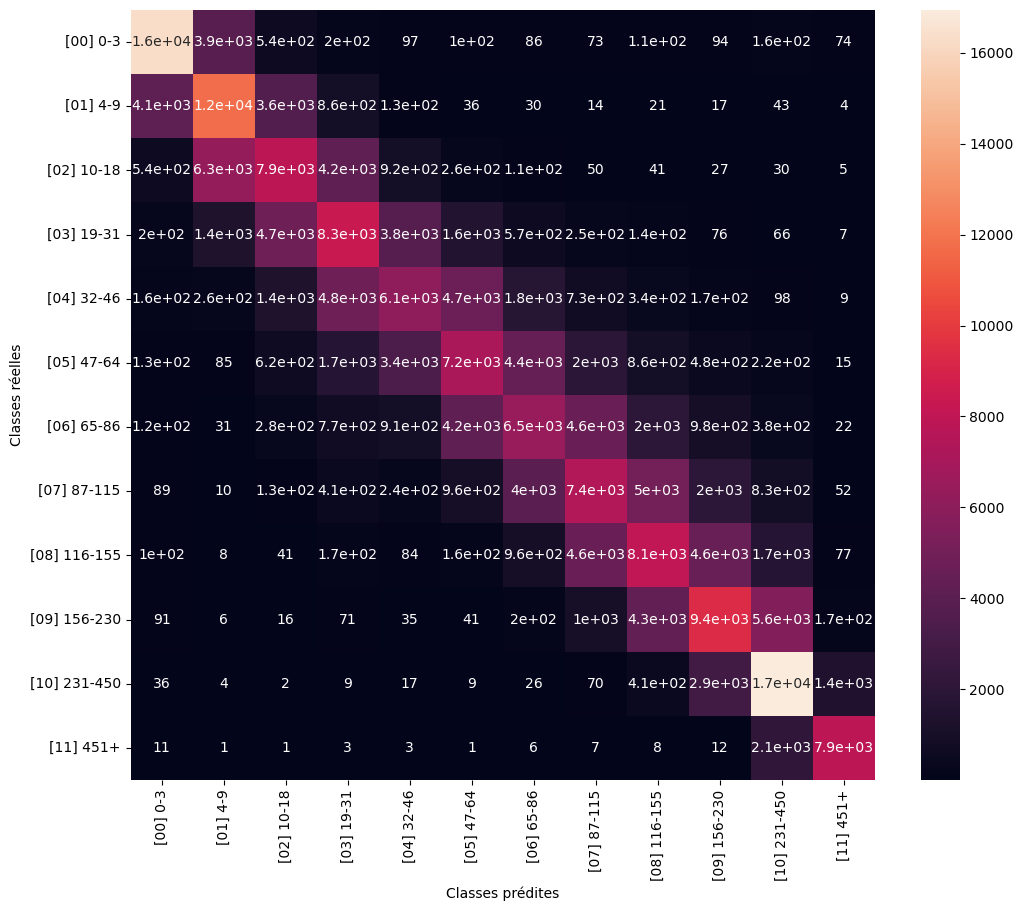

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(matrice_confusion, annot=True)
plt.show()

In [ ]:
## Rapport de classification

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    [00] 0-3       0.75      0.75      0.75     21765
    [01] 4-9       0.49      0.57      0.53     20606
  [02] 10-18       0.41      0.39      0.40     20398
  [03] 19-31       0.39      0.39      0.39     21144
  [04] 32-46       0.39      0.30      0.34     20456
  [05] 47-64       0.37      0.34      0.36     21160
  [06] 65-86       0.35      0.31      0.33     20783
 [07] 87-115       0.36      0.35      0.35     21230
[08] 116-155       0.38      0.39      0.39     20447
[09] 156-230       0.45      0.45      0.45     20928
[10] 231-450       0.60      0.77      0.68     21875
   [11] 451+       0.81      0.78      0.80     10077

    accuracy                           0.47    240869
   macro avg       0.48      0.48      0.48    240869
weighted avg       0.47      0.47      0.47    240869

